# K-Means Clustering From Scratch

### Used in:
- Semi-supervised Learning.
- Unsupervised Learning.

### For more info please check:
- <a href="https://en.wikipedia.org/wiki/K-means_clustering">k-means clustering</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
class k_means:
    def predict(self, X):
        if (hasattr(self, 'means') & hasattr(self, 'K')):
            t_predicted = self.__predict(X)
            return t_predicted
        else:
            print('Please run fit in order to be able to use predict')
            
    def __predict(self, X):
        y = np.zeros((len(X)))
        D = np.zeros((len(X), self.K))
        for k in range(self.K):
            D[:, k] = np.sum((X-self.means[k])**2, axis=1)
        y = np.argmin(D, axis=1)
        return y
    
    def accuracy(self, y_actual, y_predicted):
        return adjusted_rand_score(y_actual, y_predicted) * 100
    
    def plot_test_data(self, X, y_actual):
        if (hasattr(self, 'means') & hasattr(self, 'K')):
            if(len(X[0]) == 2):
                y_predicted = self.__predict(X)
                classes = np.sort(np.unique(y_actual))
                color_predicted = ['C{}'.format(i) for i in y_predicted]
                color_actual = ['C{}'.format(np.where(classes == i)[0][0]) for i in y_actual]
                fig, axs = plt.subplots(2, 1)
                axs[0].scatter(X[:, 0],X[:, 1], color=color_predicted)
                axs[0].set_title('Predicted')
                axs[0].set(ylabel='X2')
                axs[0].label_outer()
                axs[1].scatter(X[:, 0],X[:, 1], color=color_actual)
                axs[1].set_title('Actual')
                axs[1].set(xlabel='X1', ylabel='X2')
            else:
                print('The plot is available for 2 features data only')
        else:
            print('Please run fit in order to be able to use predict')
        
    def fit(self, X, K, iterations = 100):
        self.X = X
        self.K = K
        self.iterations = iterations
        n, m = X.shape
        self.means = np.zeros((self.K, m))
        error = 1
        for i in range(m):
            self.means[:, i] = np.random.uniform(np.min(self.X[:, i]), np.max(self.X[:, i]), (self.K))
        self.iteration = 0
        while (self.iteration < self.iterations and error != 0.0):
            y_predicted = self.__predict(self.X)
            old_means = self.means.copy()
            self.iteration += 1
            for k in range(self.K):
                if (len(self.X[y_predicted == k]) > 0):
                    self.means[k] = np.mean(self.X[y_predicted == k], axis=0)
            error = np.linalg.norm(self.means - old_means)
            

# Dataset 1

### Training

In [3]:
Data = np.genfromtxt('synth.tr.csv', delimiter=',', skip_header=True)
X = Data[:, 1:3]
t = Data[:, 3]

km = k_means()
km.fit(X, 2)

### Testing

Accuracy 0.3361720131436374 %


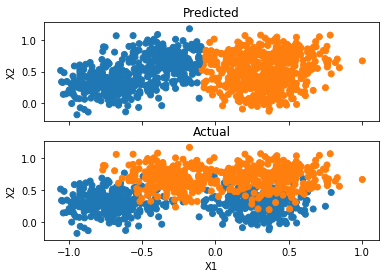

In [4]:
Data_test = np.genfromtxt('synth.te.csv', delimiter=',', skip_header=True)
X_test = Data_test[:, 1:3]
y_actual = Data_test[:, 3]
y_predicted = km.predict(X_test)
acc = km.accuracy(y_actual, y_predicted)
print('Accuracy', acc, '%')
km.plot_test_data(X_test, y_actual)

# Dataset 2

### Training

In [5]:
Data2 = np.genfromtxt('Data1.txt')
# Data2 = Data2[Data2[:,0] < 40] # Without outliers
X2 = Data2[:, 0:2]
t2 = np.array([1 if i >= 0 else 0 for i in Data2[:, 2]])

km2 = k_means()
km2.fit(X2, 2)

### Testing

Accuracy 100.0 %


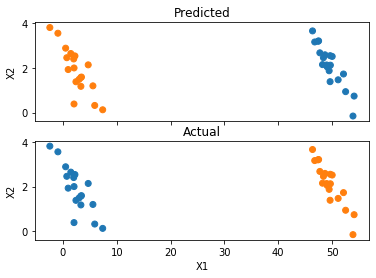

In [6]:
Data2_test = np.genfromtxt('Test1.txt')
X2_test = Data2_test[:, 0:2]
y2_actual = np.array([1 if i >= 0 else 0 for i in Data2_test[:, 2]])
y2_predicted = km2.predict(X2_test)
acc2 = km2.accuracy(y2_actual, y2_predicted)
print('Accuracy', acc2, '%')
km2.plot_test_data(X2_test, y2_actual)

# Dataset 3

### Training

In [7]:
from sklearn.datasets import make_classification


In [8]:
X3, t3 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14, class_sep=1, n_classes=2)

km3 = k_means()
km3.fit(X3, 2)

### Testing

Accuracy 92.13372138719627 %


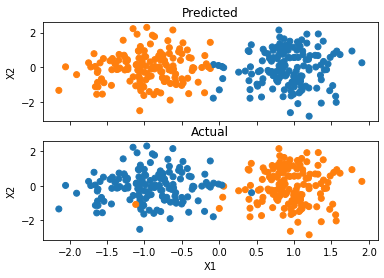

In [9]:
X3_test, y3_actual = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14, class_sep=1, n_classes=2)

y3_predicted = km3.predict(X3_test)
acc3 = km3.accuracy(y3_predicted, y3_actual)
print('Accuracy', acc3, '%')
km3.plot_test_data(X3_test, y3_actual)

# Dataset 4

### Training

In [12]:
Data4 = np.load('train.npz', allow_pickle=True)['data']
X4 = Data4[:,0:-2].astype(float)
t4 = Data4[:,-1]

km4 = k_means()
km4.fit(X4, 6)

### Testing

In [13]:
Data4_test = np.load('test.npz', allow_pickle=True)['data']
X4_test = Data4_test[:,0:-2].astype(float)
y4_actual = Data4_test[:,-1]
    
y4_predicted = km4.predict(X4_test)
acc4 = km4.accuracy(y4_actual, y4_predicted)
print('Accuracy', acc4, '%')
km4.plot_test_data(X4_test, y4_actual)

Accuracy 33.396289724917885 %
The plot is available for 2 features data only
